# Project --> Baseball Case Study
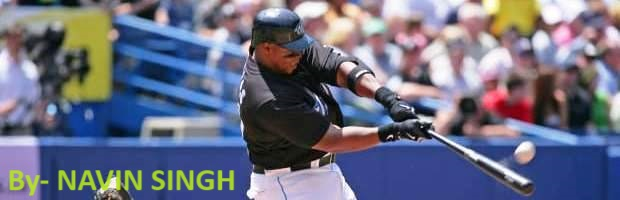

# Project Description
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

For More Details of Project -->
* https://github.com/ksingh9398/Internship-Project/blob/main/First-Phase-Evaluation-Projects--1-.pdf

For Dataset--> 
* https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv 

In [24]:
# Import Library 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
df=pd.read_csv('baseball.csv')

In [72]:
len(df)

30

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


here W column is output column, else input columns

In [4]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [5]:
df.shape

(30, 17)

In [6]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [7]:
df.columns.value_counts()

W      1
SB     1
SV     1
SHO    1
CG     1
ERA    1
ER     1
RA     1
SO     1
R      1
BB     1
HR     1
3B     1
2B     1
H      1
AB     1
E      1
Name: count, dtype: int64

In [8]:
df.columns.unique()

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [9]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

Here all columns are int64 data type, but only ERA column is float64 data type

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


Here we can clearly see that there is no any null values

In [11]:
df.info

<bound method DataFrame.info of       W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  2

In [134]:
df["W"].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [135]:
df["AB"].unique()

array([5575, 5467, 5439, 5533, 5605, 5509, 5567, 5485, 5640, 5511, 5459,
       5417, 5544, 5600, 5484, 5631, 5491, 5480, 5571, 5527, 5428, 5463,
       5420, 5529, 5385, 5565, 5649, 5457, 5572], dtype=int64)

In [136]:
df["H"].unique()

array([1497, 1349, 1395, 1381, 1515, 1480, 1397, 1370, 1383, 1495, 1419,
       1363, 1331, 1379, 1405, 1386, 1462, 1341, 1378, 1382, 1351, 1420,
       1361, 1374, 1346, 1486, 1494, 1324, 1479], dtype=int64)

In [76]:
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [12]:
df.isnull().value_counts()

W      R      AB     H      2B     3B     HR     BB     SO     SB     RA     ER     ERA    CG     SHO    SV     E    
False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False    30
Name: count, dtype: int64

In [13]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<Axes: title={'center': 'Check Null Values'}>

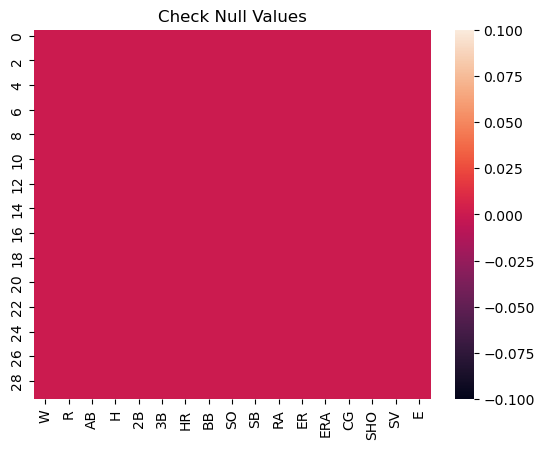

In [14]:
# Check null value with the help of Heatmap
plt.title('Check Null Values')
sns.heatmap(df.isnull())

No any null values is there 

<Axes: >

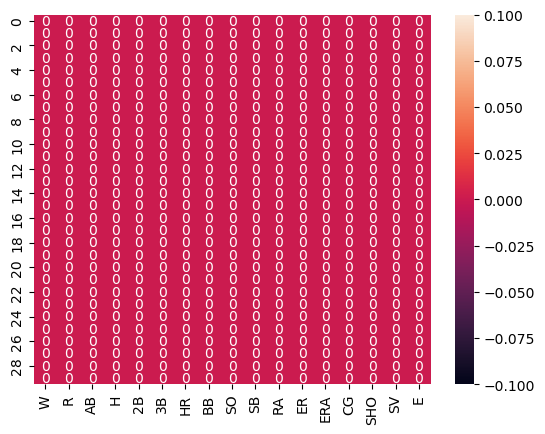

In [15]:
sns.heatmap(df.isnull(),annot=True)

In [16]:
# Checking number of unique values in each column
df.nunique().to_frame("No. of unique values")

,No. of unique values
W,24
R,28
AB,29
H,29
2B,22
3B,23
HR,27
BB,29
SO,29
SB,27


In [17]:
# Check duplicate values
print('Total Duplicate row are = ', df.duplicated().sum())

Total Duplicate row are =  0


In [18]:
# Checking the value counts of each column 
for i in df.columns:
    print(df[i].value_counts())
    print("\n")


W
68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: count, dtype: int64


R
689    2
696    2
724    1
647    1
650    1
720    1
667    1
626    1
573    1
613    1
703    1
683    1
640    1
655    1
697    1
694    1
656    1
661    1
729    1
751    1
748    1
644    1
713    1
764    1
891    1
622    1
669    1
737    1
Name: count, dtype: int64


AB
5485    2
5575    1
5631    1
5457    1
5649    1
5565    1
5385    1
5529    1
5420    1
5463    1
5428    1
5527    1
5571    1
5480    1
5491    1
5484    1
5467    1
5600    1
5544    1
5417    1
5459    1
5511    1
5640    1
5567    1
5509    1
5605    1
5533    1
5439    1
5572    1
Name: count, dtype: int64


H
1363    2
1497    1
1386    1
1324    1
1494    1
1486    1
1346    1
1374    1
1361    1
1420    1
1351    1
1382    1
1378    1
1341    1
1462    1

In [19]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [20]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


This gives the statistical information of the numerical columns. The summary of the dataset looks perfect since there is no negative/invalid values present.

From the above description we can observe the following:-

The counts of all the columns are same which means there are no missing values in the dataset.

The median(50%) value is greater than the mean in all columns which means the data is skewed to left in these column.

By summarizing the data we can observe there is a little differences between 75% and max in some columns ( R, ERA, SHO, SV,E ) hence there are outliers present int he data.

We can also notice the Standard deviation, minimum value, 25% percentile values from this describe method.

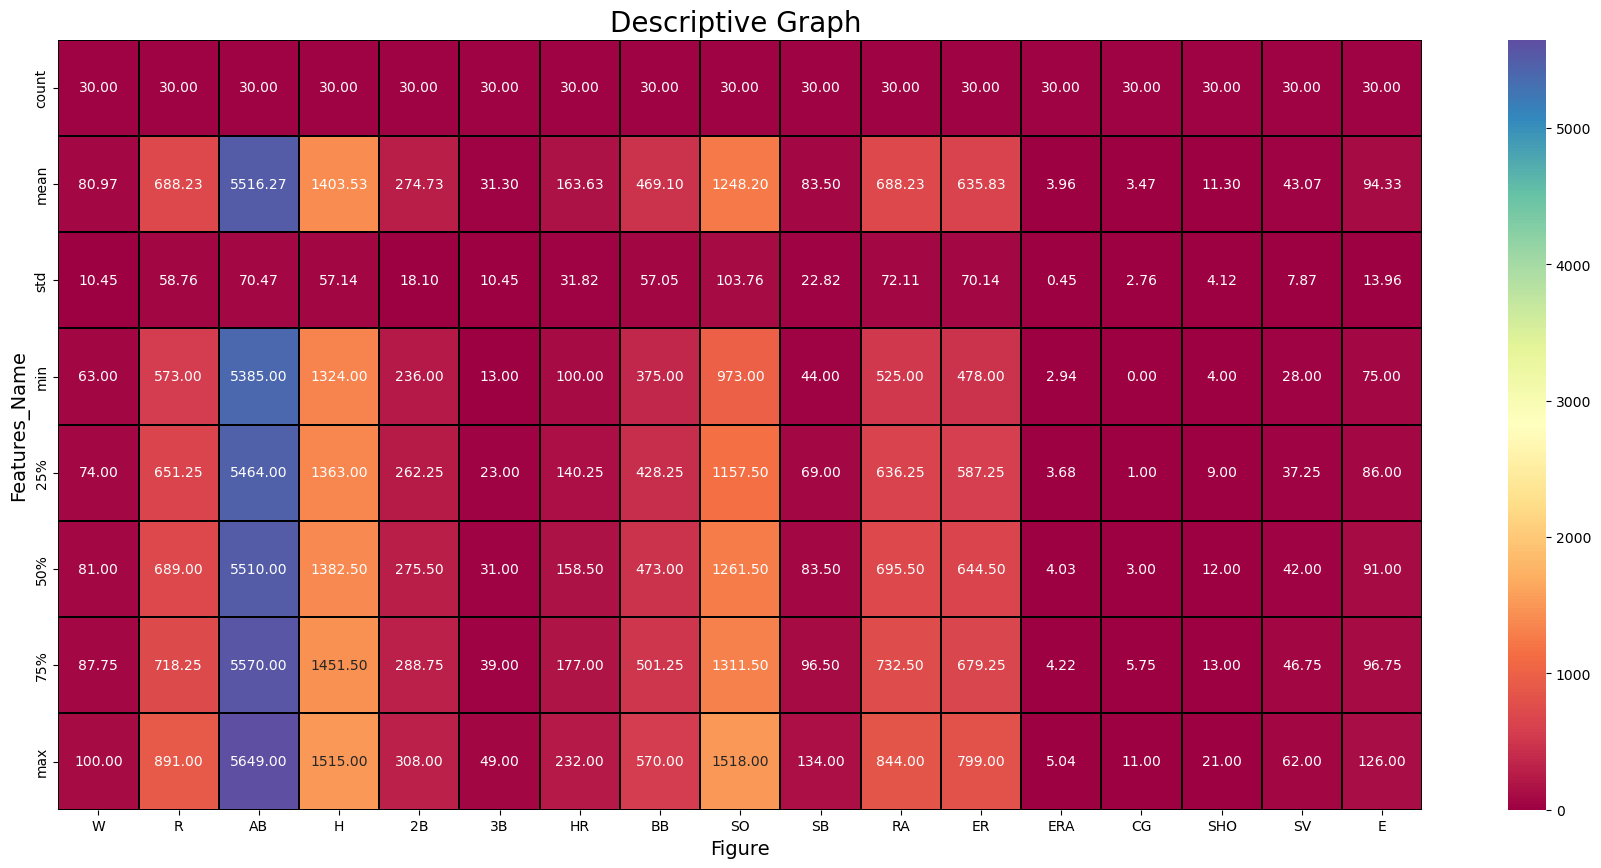

In [21]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True, fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Features_Name',fontsize=14)
plt.title('Descriptive Graph ', fontsize=20)
plt.show()

# Let’s visualize the distribution of continuous features

# Univariate Analysis

In [35]:
df.head(2)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86


<Axes: ylabel='count'>

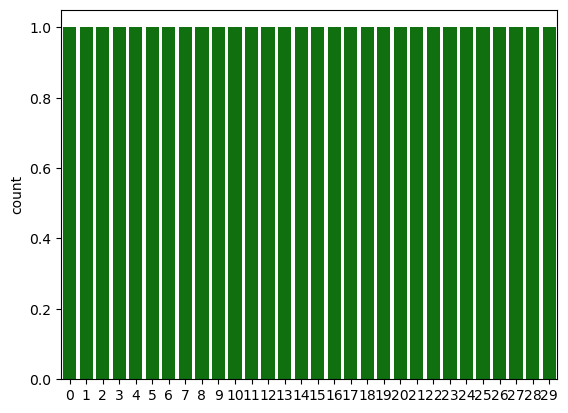

In [40]:
sns.countplot(df['W'],color='g')

<Axes: ylabel='count'>

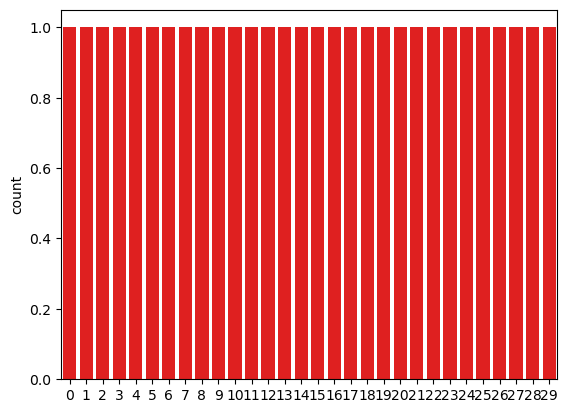

In [152]:
sns.countplot(df['R'],color='r')

<Axes: ylabel='count'>

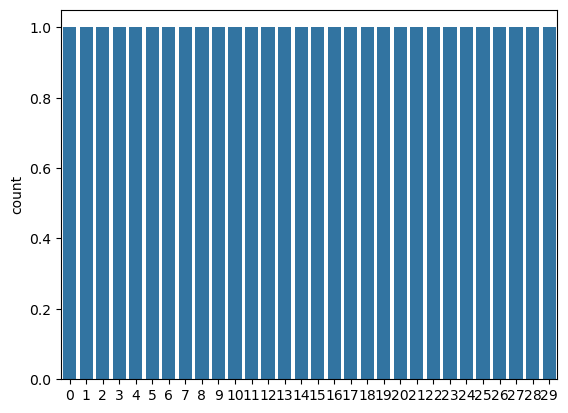

In [153]:
sns.countplot(df['AB'])

<Axes: ylabel='count'>

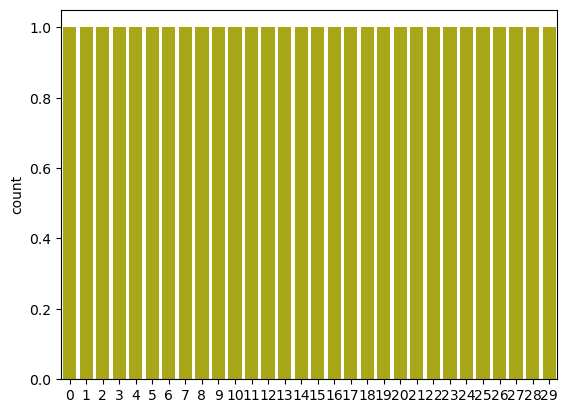

In [155]:
sns.countplot(df['H'],color='y')

<Axes: ylabel='count'>

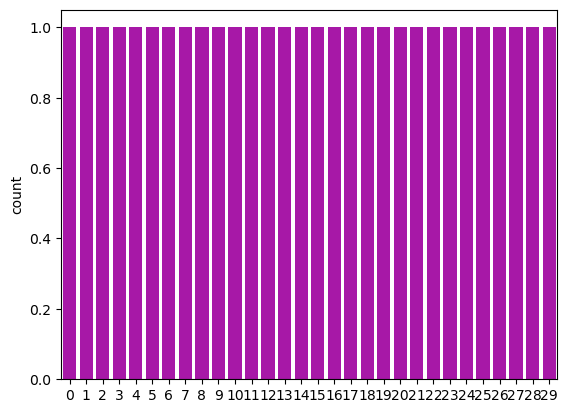

In [156]:
sns.countplot(df['2B'],color='m')

<Axes: ylabel='count'>

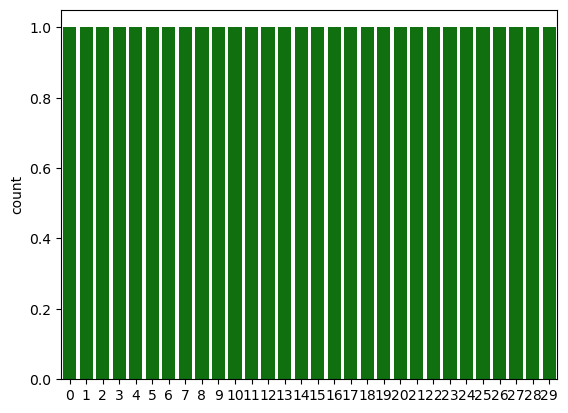

In [157]:
sns.countplot(df['BB'],color='g')

<Axes: ylabel='count'>

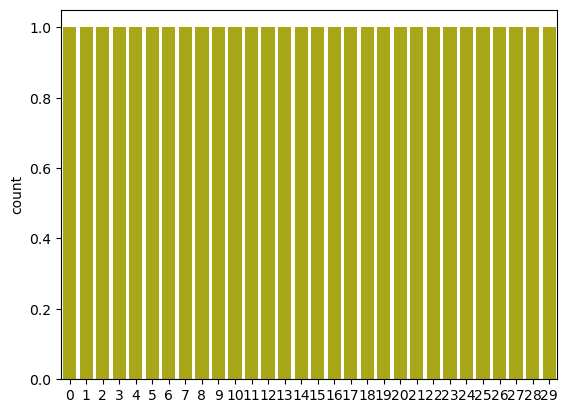

In [158]:
sns.countplot(df['E'],color='y')

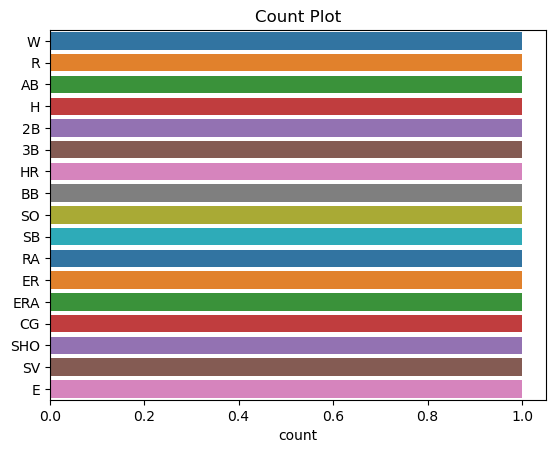

In [38]:
plt.title('Count Plot')
for i in df:
    sns.countplot(i)

Here All columns have same data 

# Bivariate Analysis

# Lmplot
Let's Chack Relation of each column with W columns, with the help of Lmplot

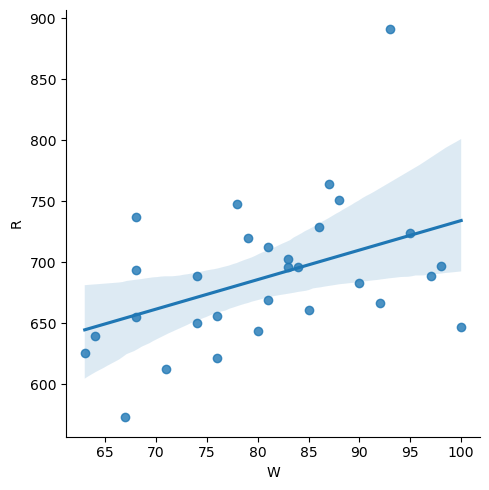

In [41]:
sns.lmplot(x='W',y='R',data=df, palette='colorblind')

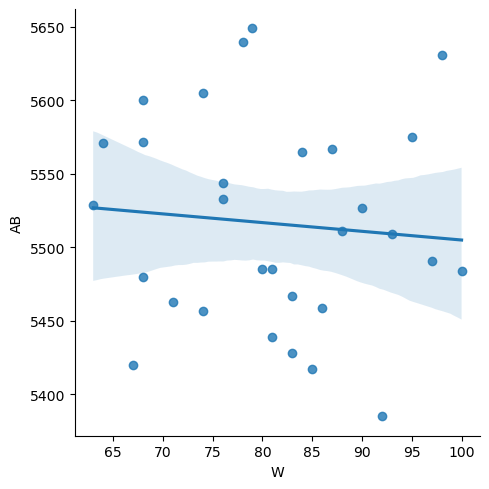

In [42]:
sns.lmplot(x='W',y='AB',data=df, palette='colorblind')

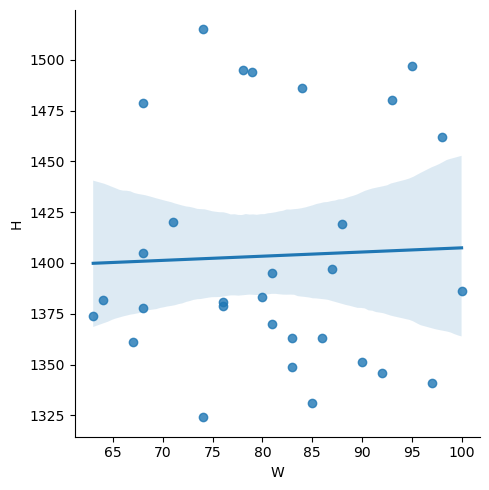

In [43]:
sns.lmplot(x='W',y='H',data=df, palette='colorblind')

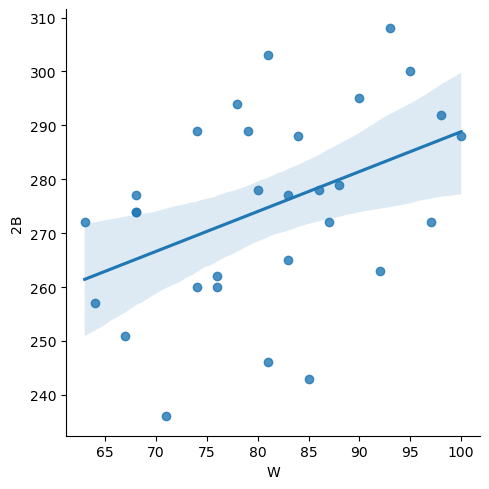

In [44]:
sns.lmplot(x='W',y='2B',data=df, palette='colorblind')

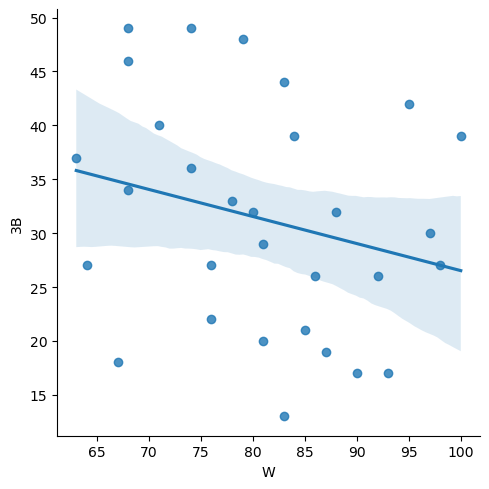

In [45]:
sns.lmplot(x='W',y='3B',data=df, palette='colorblind')

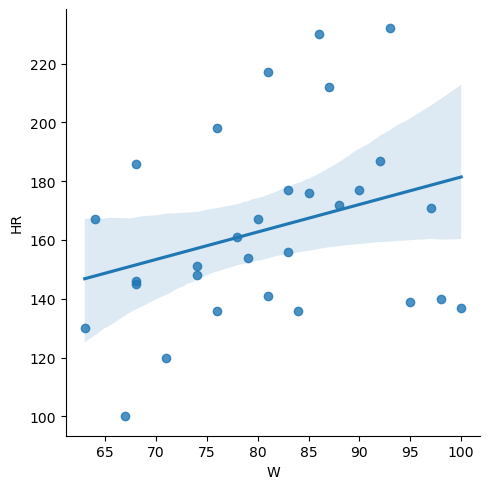

In [46]:
sns.lmplot(x='W',y='HR',data=df, palette='colorblind')

In [47]:
df.tail(1)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


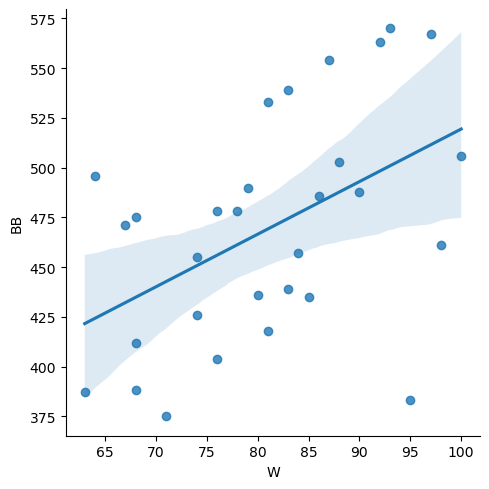

In [56]:
sns.lmplot(x='W', y='BB',data=df)

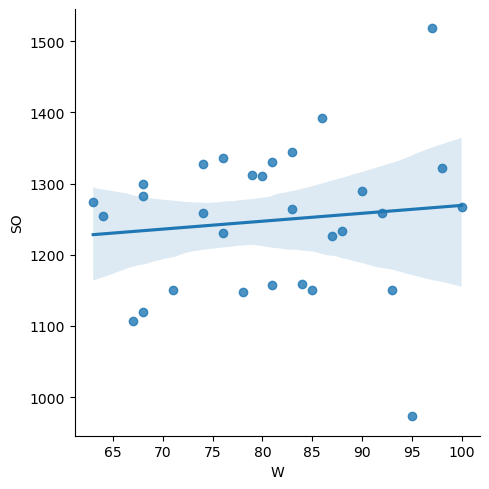

In [57]:
sns.lmplot(x='W',y='SO',data=df)

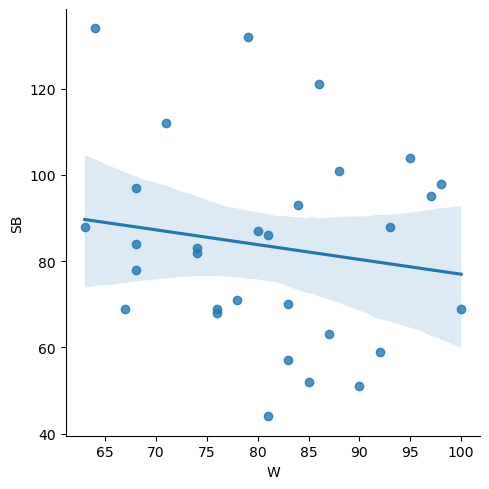

In [58]:
sns.lmplot(x='W',y='SB',data=df)

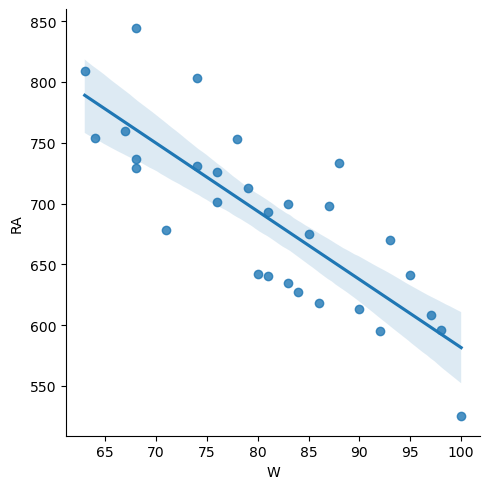

In [59]:
sns.lmplot(x='W',y='RA',data=df)

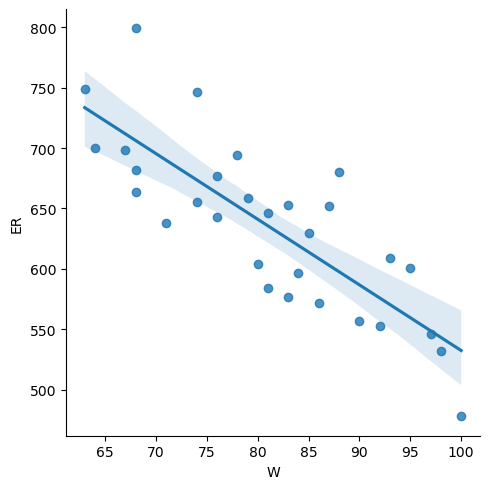

In [60]:
sns.lmplot(x='W',y='ER',data=df)

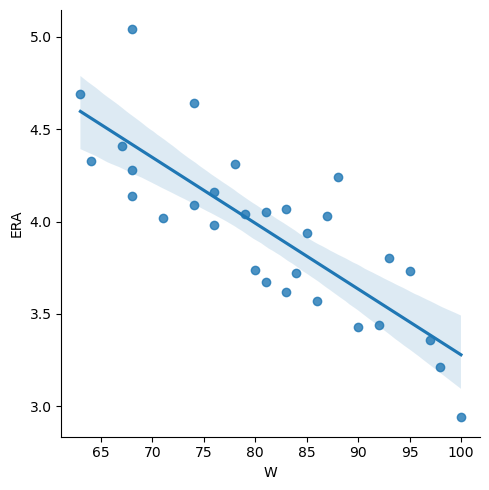

In [61]:
sns.lmplot(x='W',y='ERA',data=df)

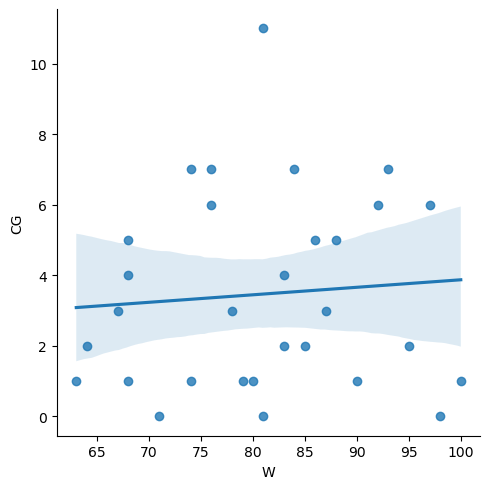

In [64]:
sns.lmplot(x='W',y='CG',data=df)

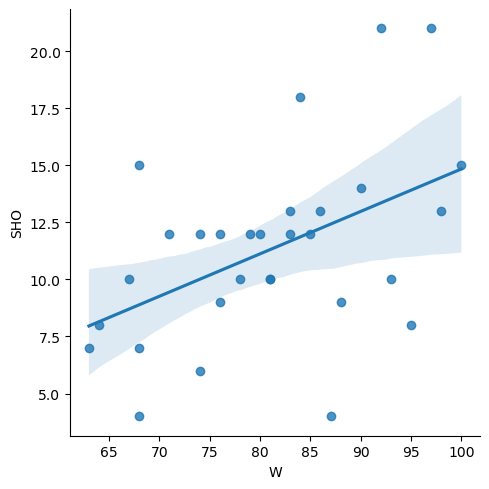

In [65]:
sns.lmplot(x='W',y='SHO',data=df)

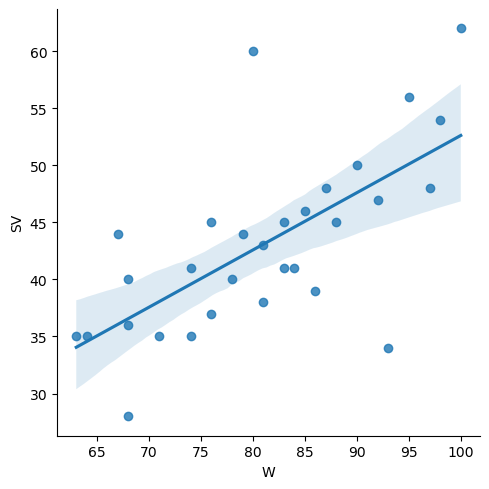

In [148]:
sns.lmplot(x='W',y='SV',data=df)

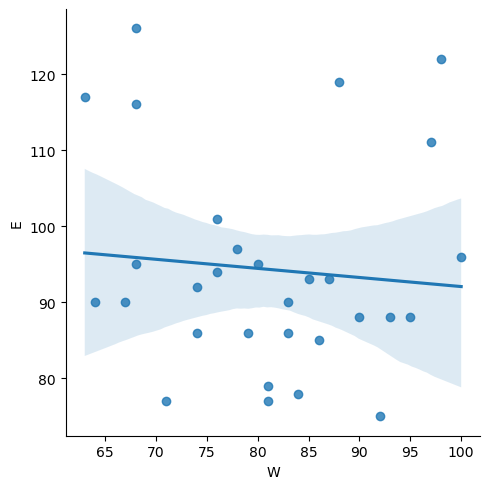

In [68]:
sns.lmplot(x='W',y='E',data=df)

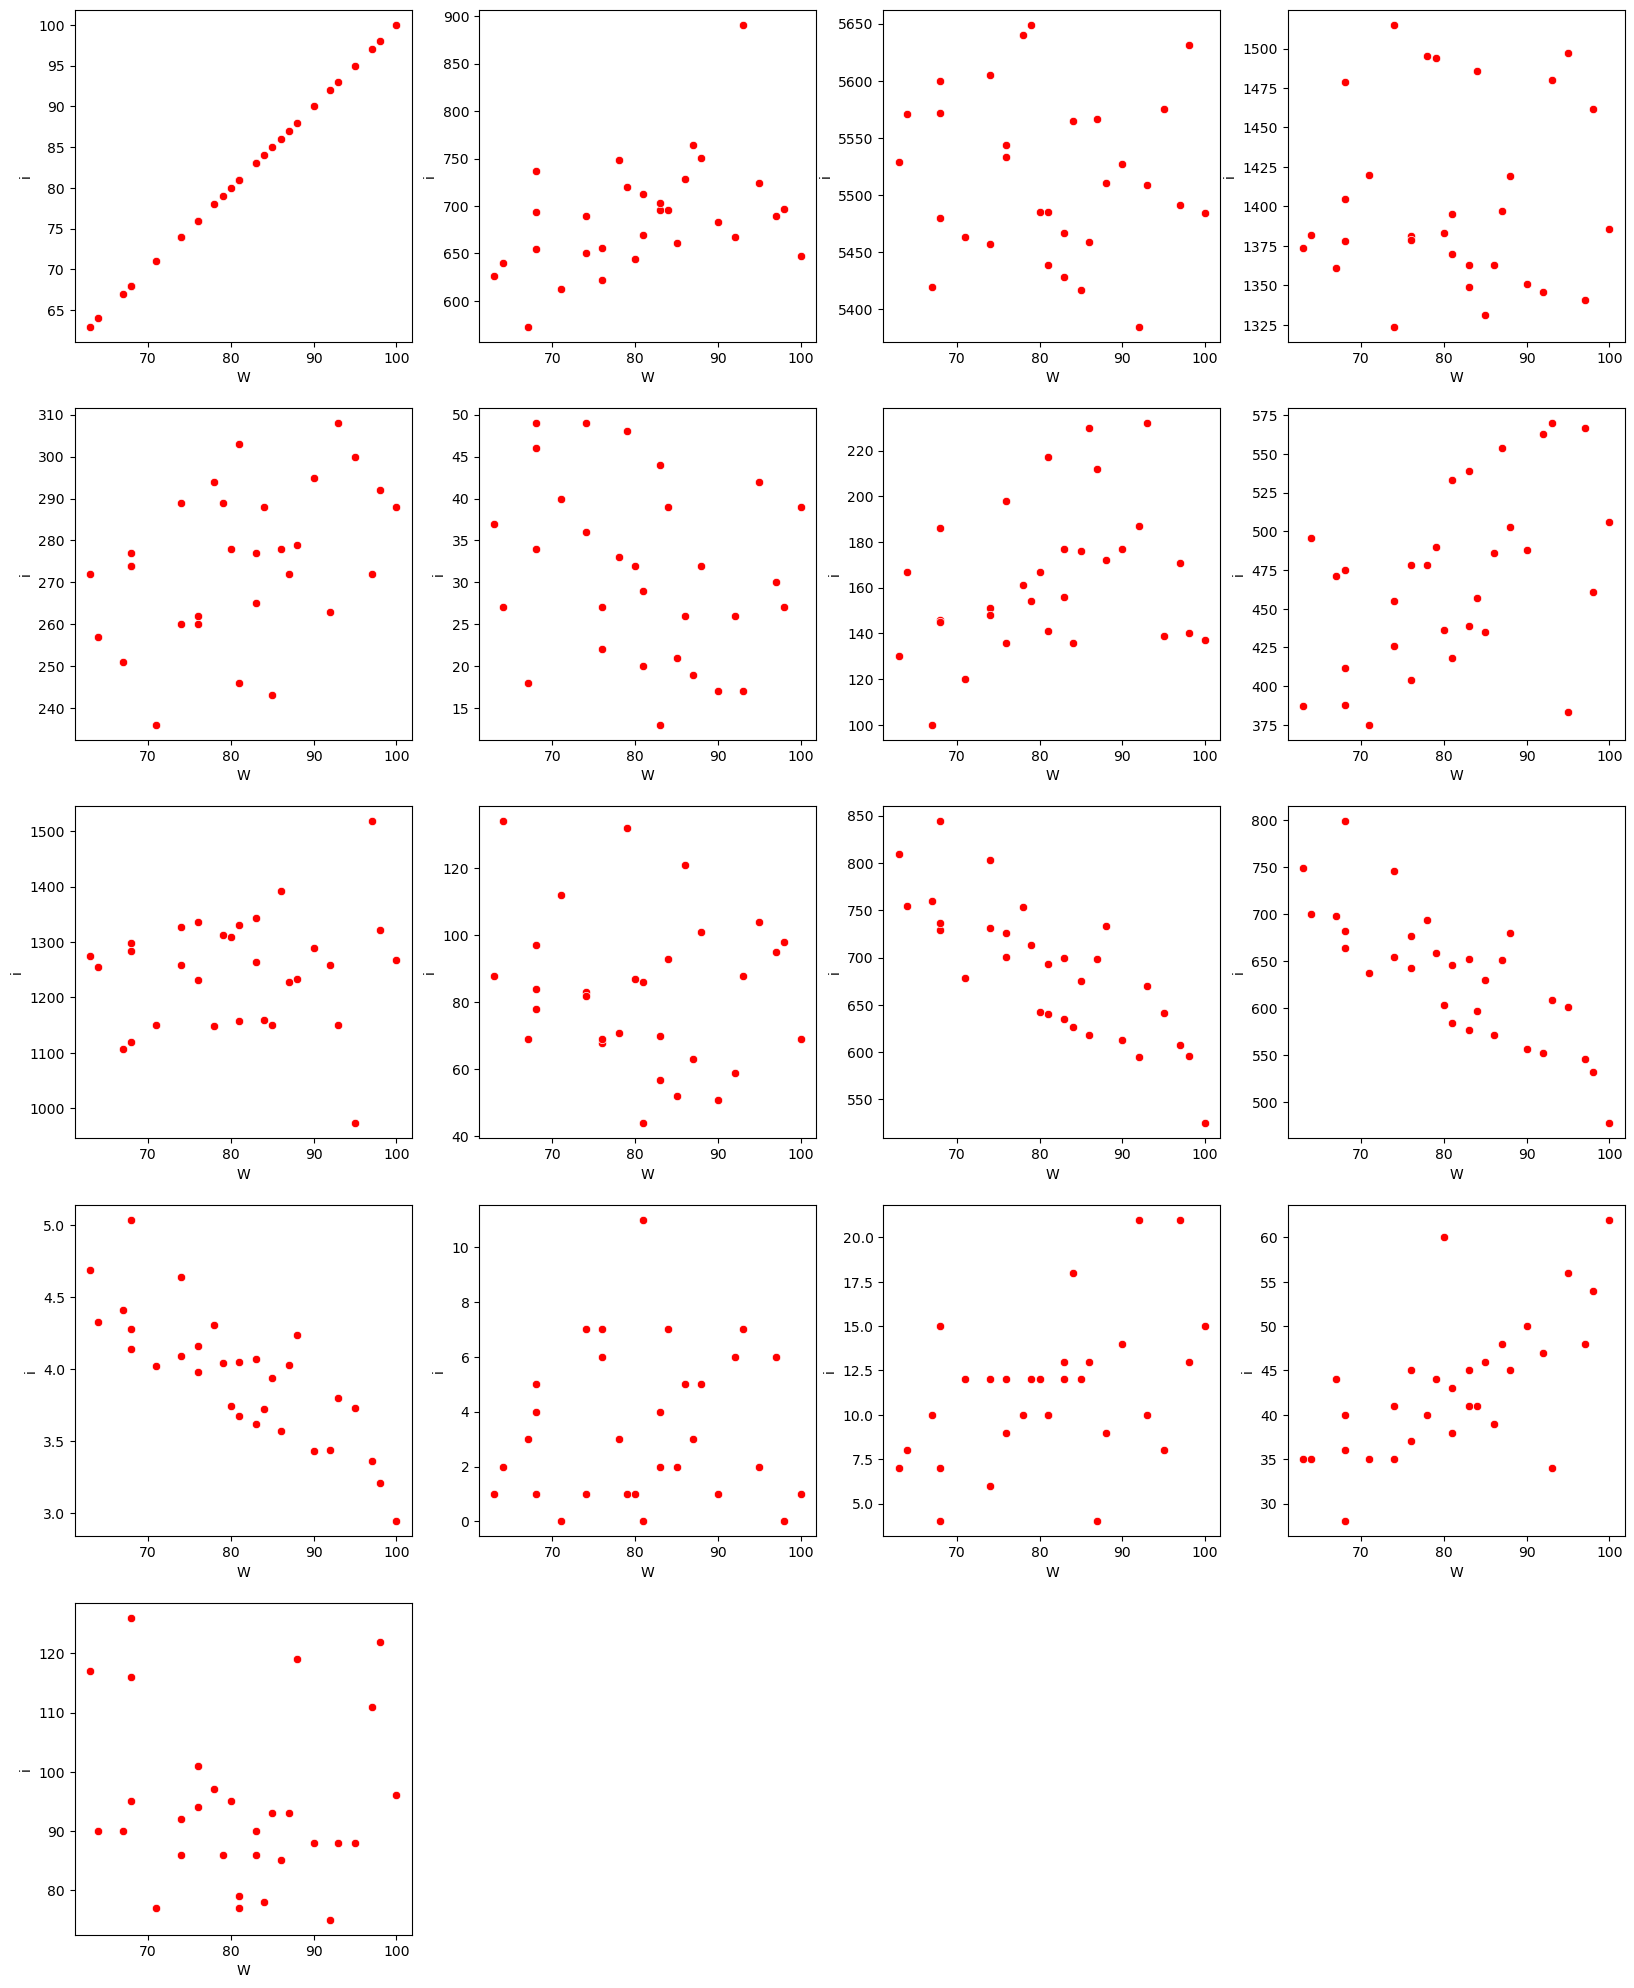

In [80]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=17:
        plt.subplot(5,4,p)
        sns.scatterplot(x='W',y=i,data=df,color='r')
        plt.xlabel('W')
        plt.ylabel('i')
    p+=1
    
plt.show()

from this figure we can identify that all the features except volume have a high positive linear relationship with the Wins variable

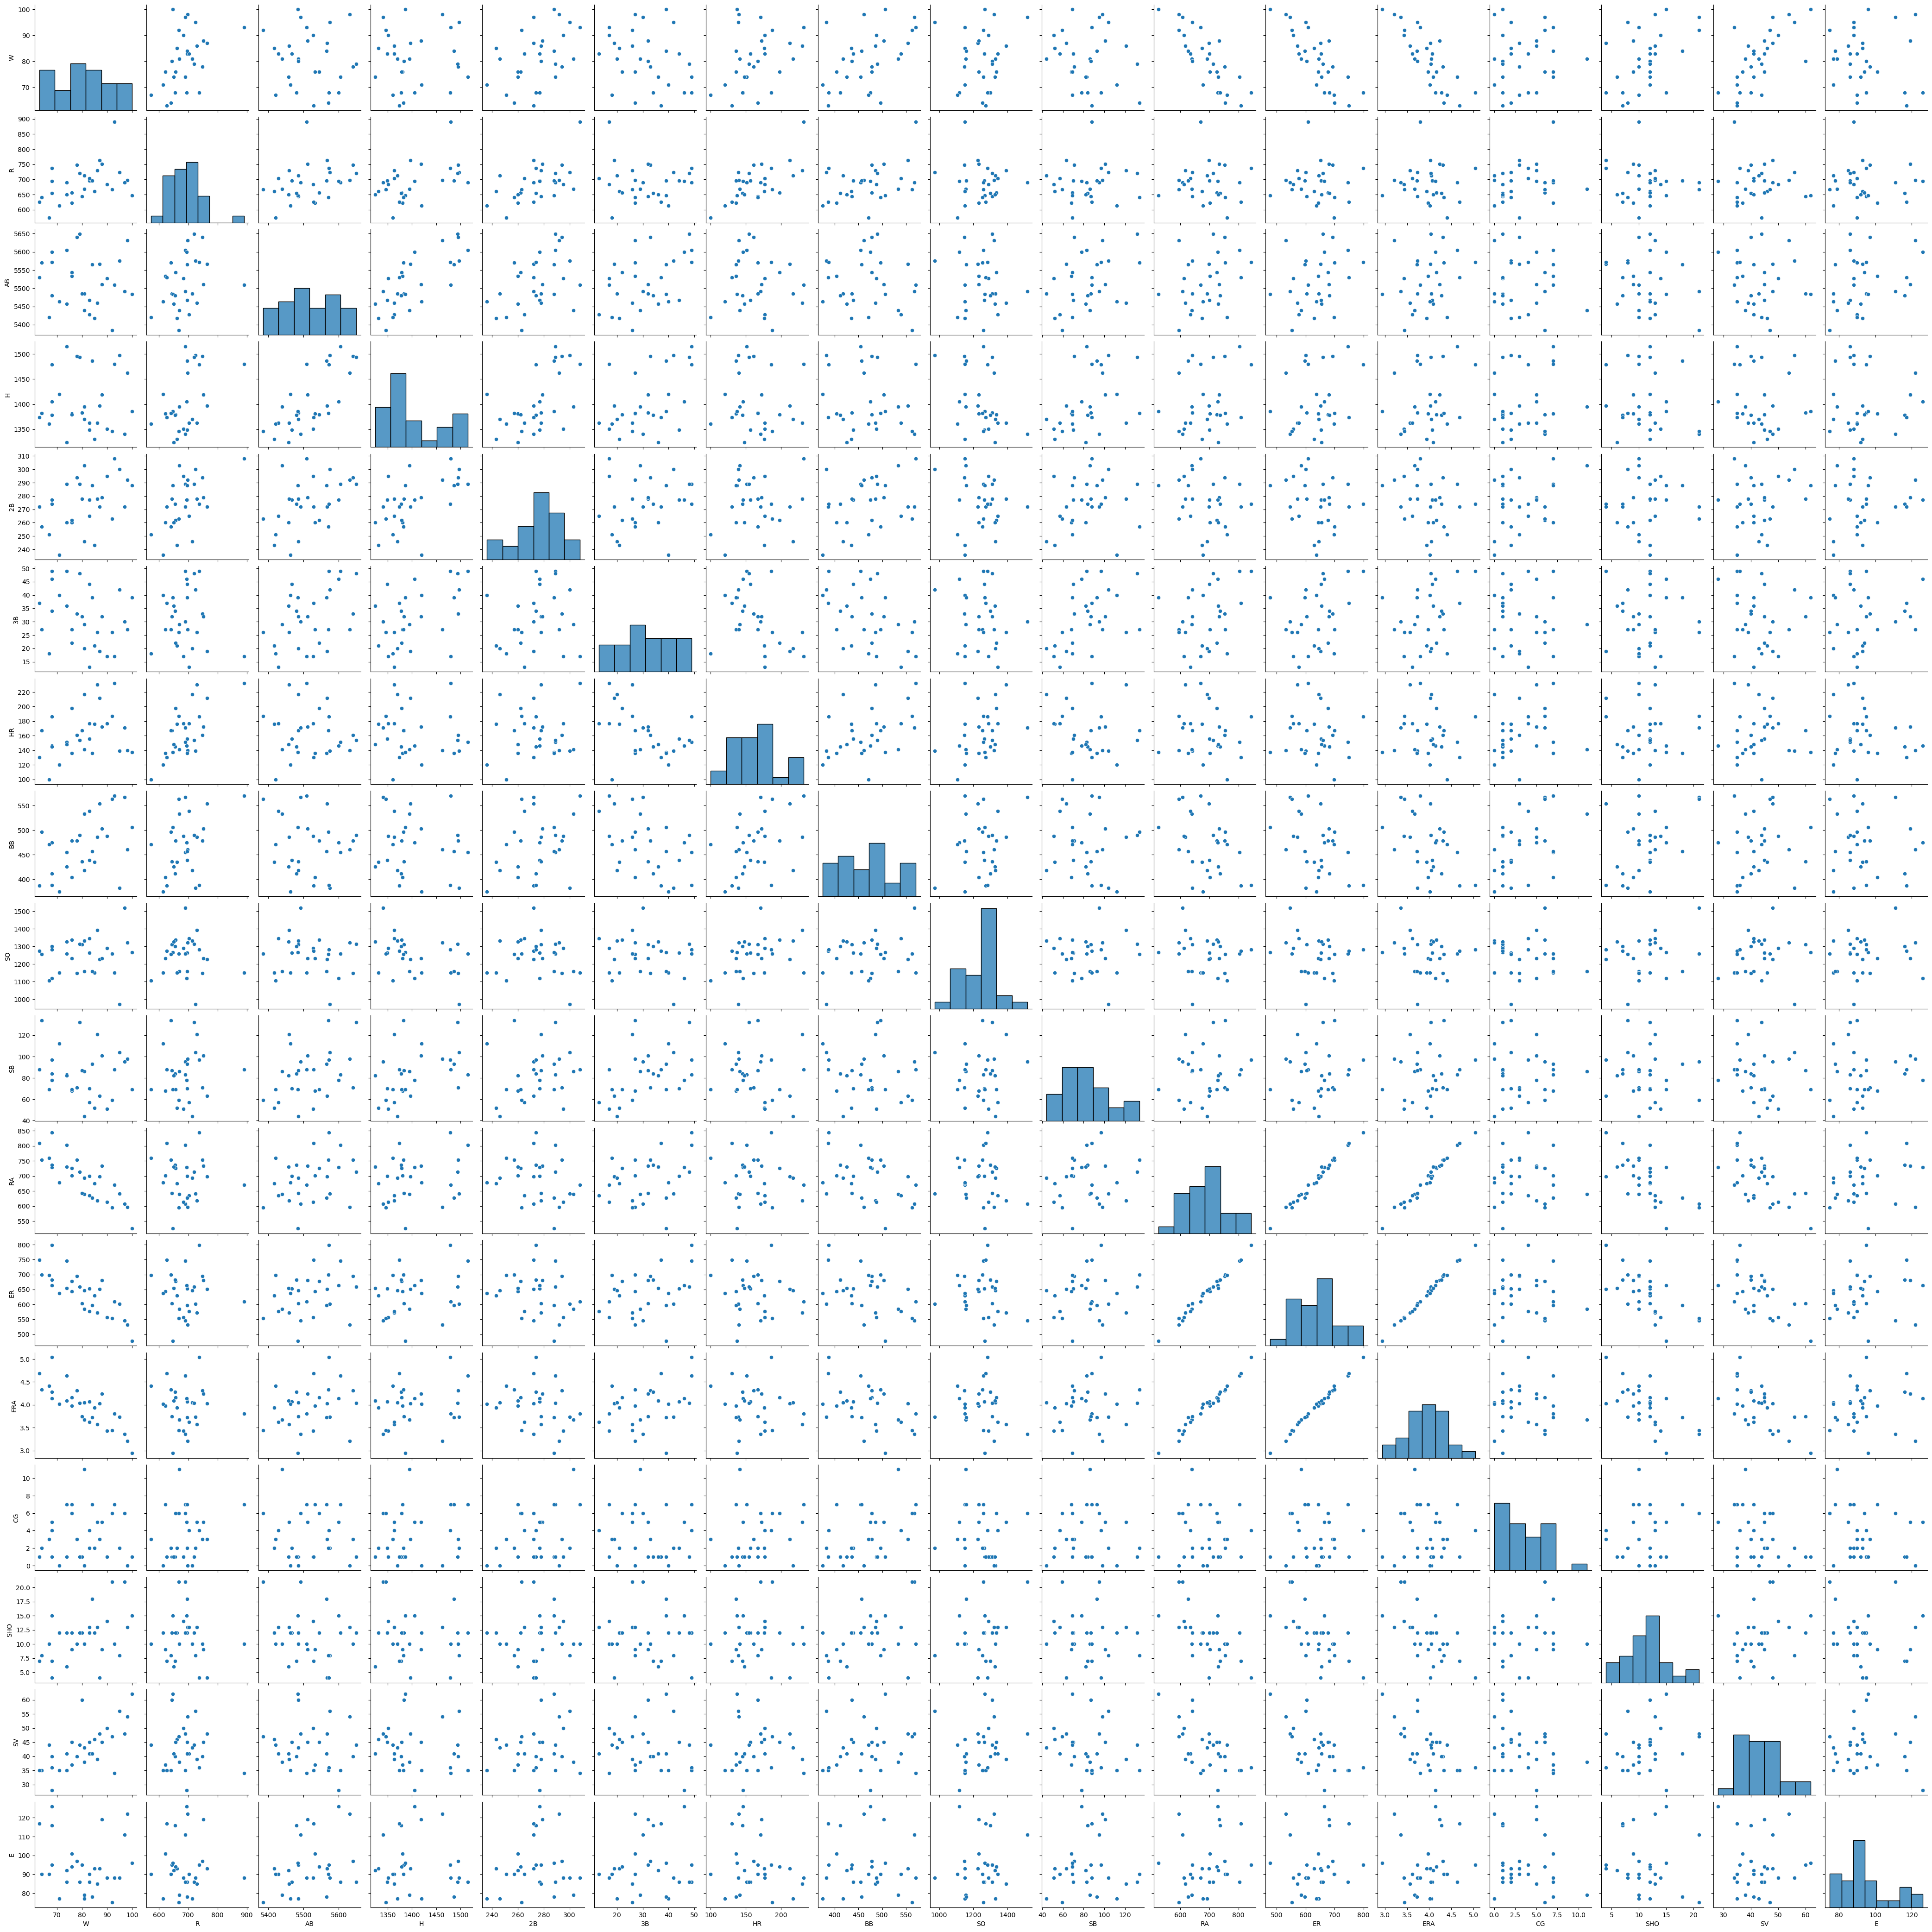

In [81]:
sns.pairplot(df)

the pairplot gives the pariwise relation between the features. On the diagonal we can notice the distribution plots.

Text(0.5, 1.0, 'histogram of wins')

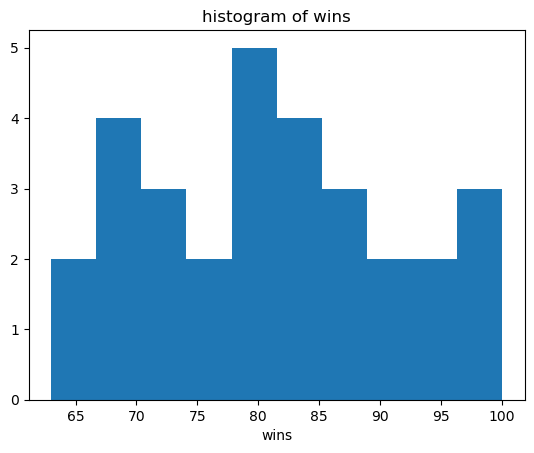

In [83]:
plt.hist(df['W'])
plt.xlabel('wins')
plt.title('histogram of wins')

check out the average wins

In [86]:
df.head(2)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86


In [84]:
df['W'].mean()

80.96666666666667

In [133]:
print(df.mean())

W        80.966667
R       688.233333
AB     5516.266667
H      1403.533333
2B      274.733333
3B       31.300000
HR      163.633333
BB      469.100000
SO     1248.200000
SB       83.500000
RA      688.233333
ER      635.833333
ERA       3.956333
CG        3.466667
SHO      11.300000
SV       43.066667
E        94.333333
dtype: float64


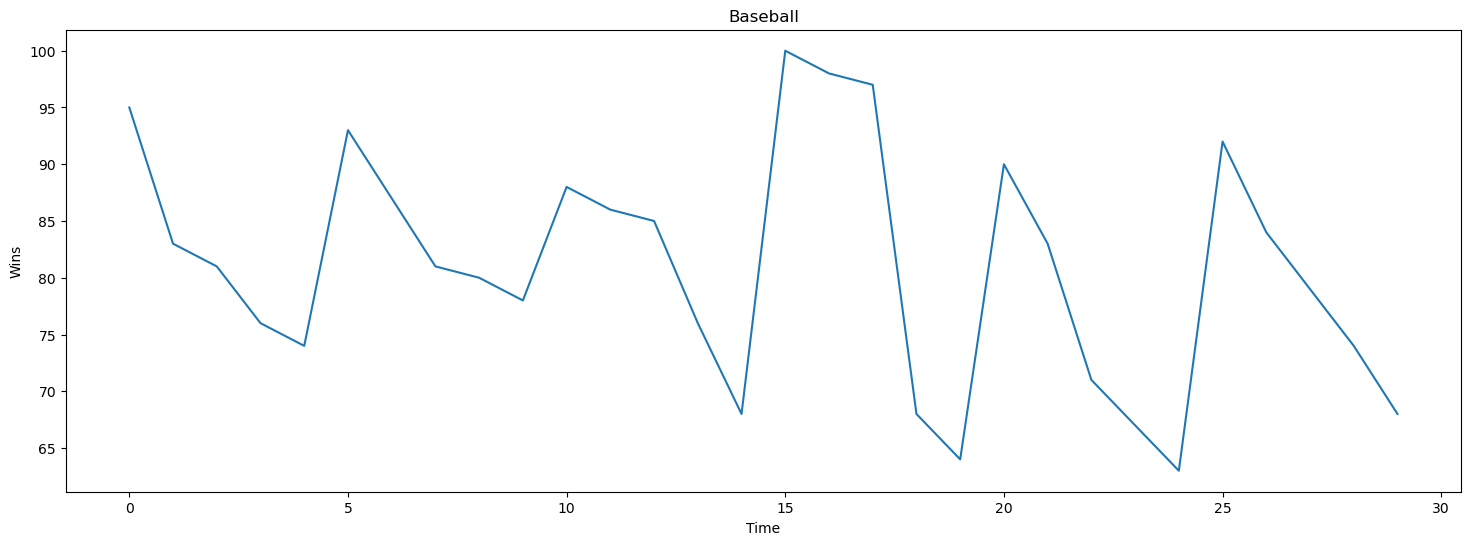

In [108]:
plt.figure(figsize=(18,6))
plt.plot(df.W, label='Wins')
plt.ylabel('Wins')
plt.xlabel('Time')
plt.title('Baseball')
plt.show()

Text(0.5, 1.0, 'The General Trand of all values')

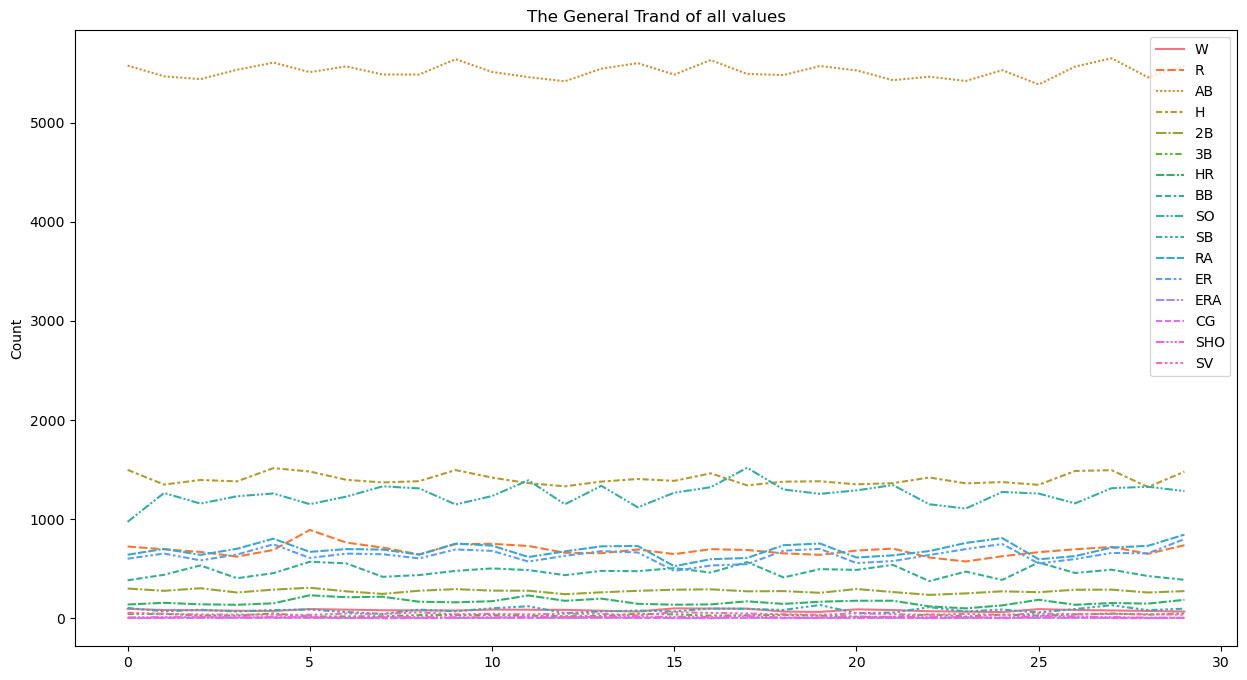

In [110]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df.iloc[:,:-1])
plt.ylabel('Count')
plt.title('The General Trand of all values')

Text(0.5, 1.0, 'Wins')

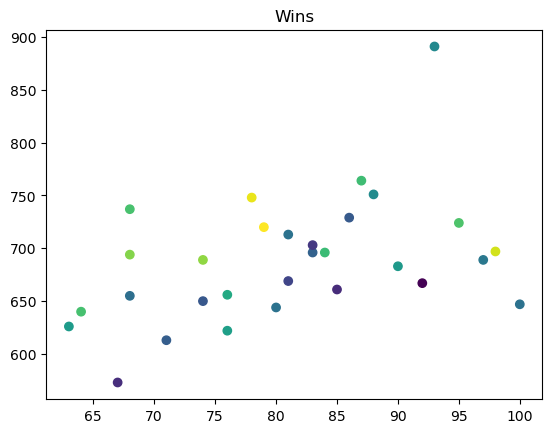

In [91]:
plt.scatter(df['W'],df['R'],c=df['AB'])
plt.title('Wins')

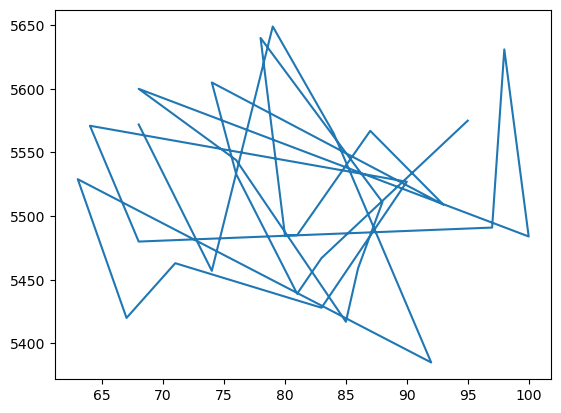

In [101]:
plt.plot(df['W'],df['AB'])

In [112]:
#check Corelation of data
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


Here is many columns have negative corelation 

In [124]:
df.corr()['W']

W      1.000000
R      0.430751
AB    -0.087947
H      0.037612
2B     0.427797
3B    -0.251118
HR     0.307407
BB     0.484342
SO     0.111850
SB    -0.157234
RA    -0.812952
ER    -0.809435
ERA   -0.819600
CG     0.080533
SHO    0.471805
SV     0.666530
E     -0.089485
Name: W, dtype: float64

In [122]:
print(df.corr()[i])

W     -0.089485
R     -0.023262
AB     0.316743
H     -0.033173
2B     0.105754
3B     0.126678
HR    -0.207597
BB    -0.075685
SO     0.155133
SB     0.079149
RA     0.198996
ER     0.136921
ERA    0.113137
CG    -0.140047
SHO   -0.115716
SV    -0.025636
E      1.000000
Name: E, dtype: float64


In [126]:
for i in df:
    print(df.corr()[i])

W      1.000000
R      0.430751
AB    -0.087947
H      0.037612
2B     0.427797
3B    -0.251118
HR     0.307407
BB     0.484342
SO     0.111850
SB    -0.157234
RA    -0.812952
ER    -0.809435
ERA   -0.819600
CG     0.080533
SHO    0.471805
SV     0.666530
E     -0.089485
Name: W, dtype: float64
W      0.430751
R      1.000000
AB     0.319464
H      0.482856
2B     0.560084
3B    -0.070072
HR     0.671283
BB     0.402452
SO    -0.054726
SB     0.081367
RA    -0.041623
ER    -0.041245
ERA   -0.049281
CG     0.232042
SHO   -0.103274
SV    -0.096380
E     -0.023262
Name: R, dtype: float64
W     -0.087947
R      0.319464
AB     1.000000
H      0.739122
2B     0.453370
3B     0.435422
HR    -0.066983
BB    -0.136414
SO    -0.106022
SB     0.372618
RA     0.316010
ER     0.309686
ERA    0.255551
CG    -0.080876
SHO   -0.197321
SV    -0.106367
E      0.316743
Name: AB, dtype: float64
W      0.037612
R      0.482856
AB     0.739122
H      1.000000
2B     0.566847
3B     0.478694
HR    -0.090855

<Axes: >

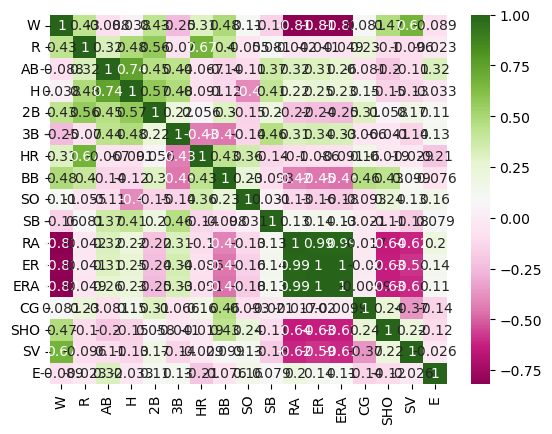

In [34]:
sns.heatmap(df.corr(),annot=True,cmap='PiYG')

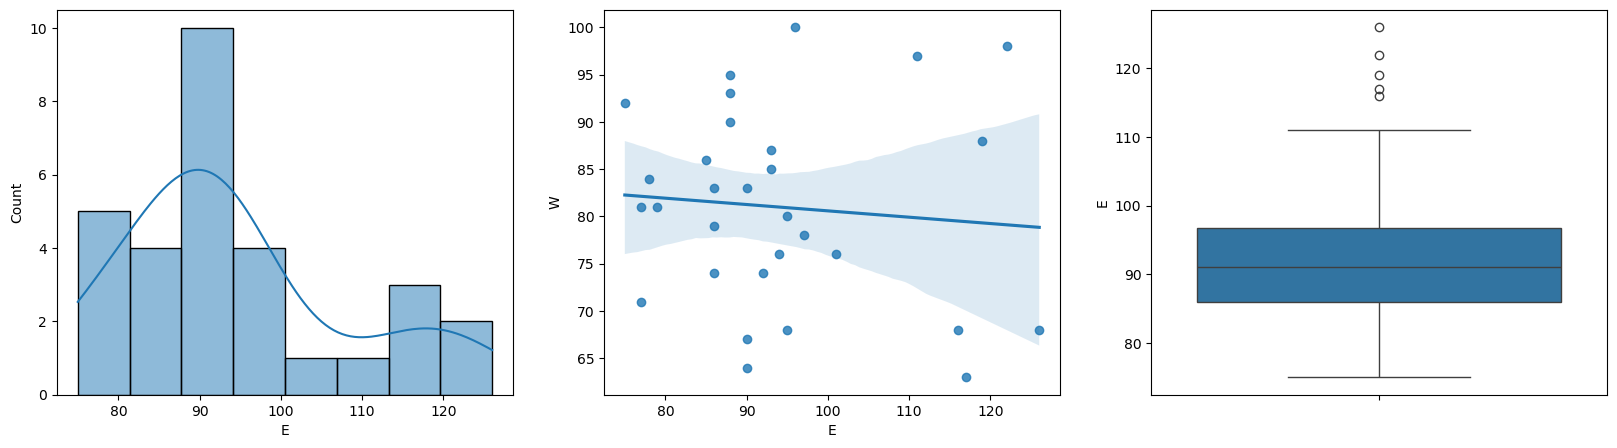

In [127]:
def pplot(df,i):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i,y='W',data=df)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
    plt.show()
pplot(df,i)

In [128]:
df.mean()

W        80.966667
R       688.233333
AB     5516.266667
H      1403.533333
2B      274.733333
3B       31.300000
HR      163.633333
BB      469.100000
SO     1248.200000
SB       83.500000
RA      688.233333
ER      635.833333
ERA       3.956333
CG        3.466667
SHO      11.300000
SV       43.066667
E        94.333333
dtype: float64

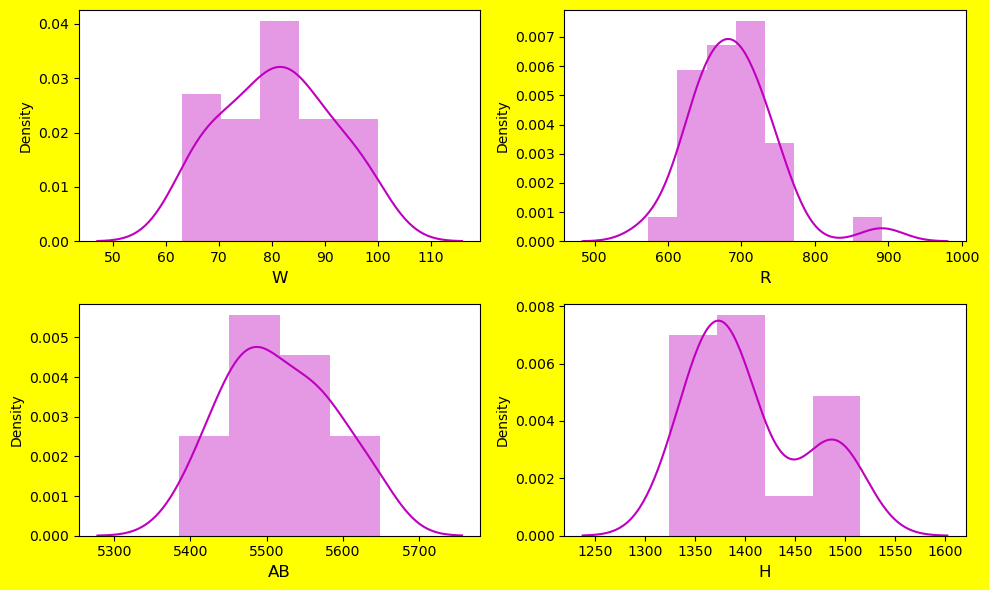

In [142]:
# let's check how the data has been distrivuted in remaising column
plt.figure(figsize=(10,6),facecolor='yellow')
plotnumber=1
for col in df:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color="m")
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

From the above distrivution plots we can notice that the data almost looks normal in all the columns

# Bivariate Analysis

In [145]:
df.head(1)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88


<Axes: title={'center': 'Comparison between W and R columns'}, xlabel='W', ylabel='R'>

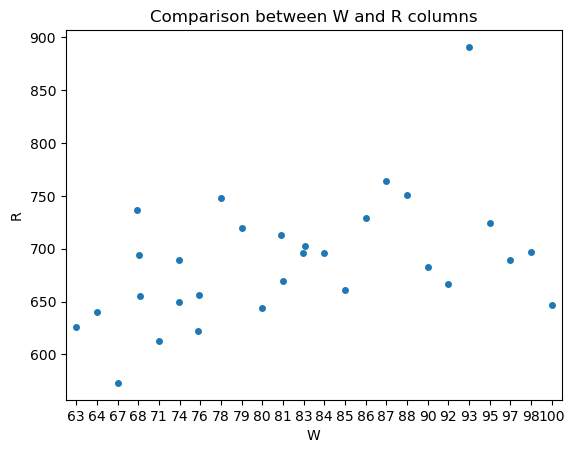

In [146]:
# comparing tenure and SeniorCitizen
plt.title('Comparison between W and R columns')
sns.stripplot(x='W',y='R',data=df)

<Axes: title={'center': 'Comparison between W and AB columns'}, xlabel='W', ylabel='AB'>

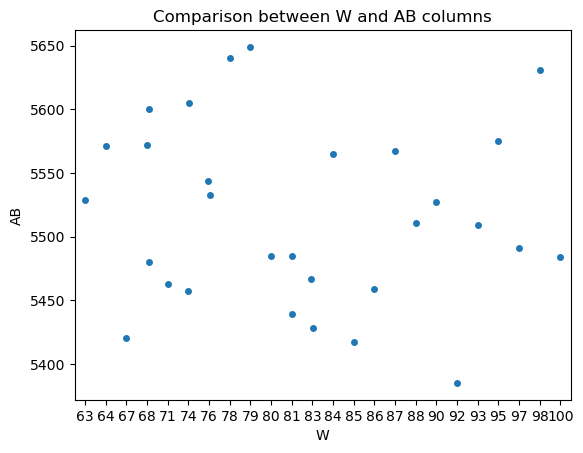

In [159]:
plt.title('Comparison between W and AB columns')
sns.stripplot(x='W',y='AB',data=df)

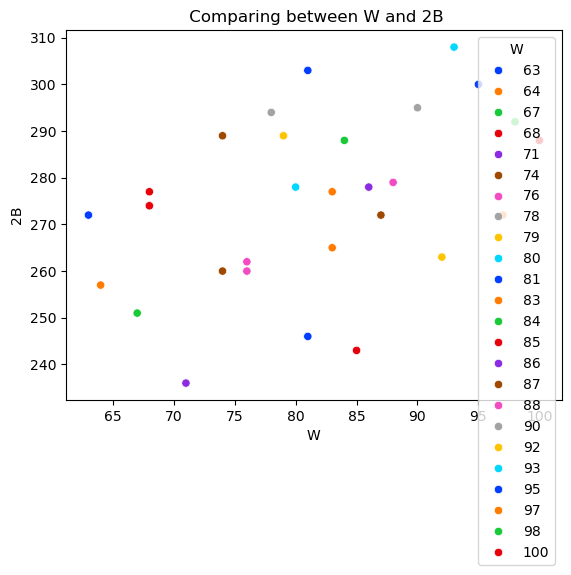

In [161]:
# Comparing W and 2B 

plt.title(" Comparing between W and 2B")
sns.scatterplot(x='W',y='2B',data=df, hue= 'W', palette='bright')
plt.show()

# Checking for Outliers

In [165]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [167]:
numerical_col=[]
for i in df.columns:
    numerical_col.append(i)

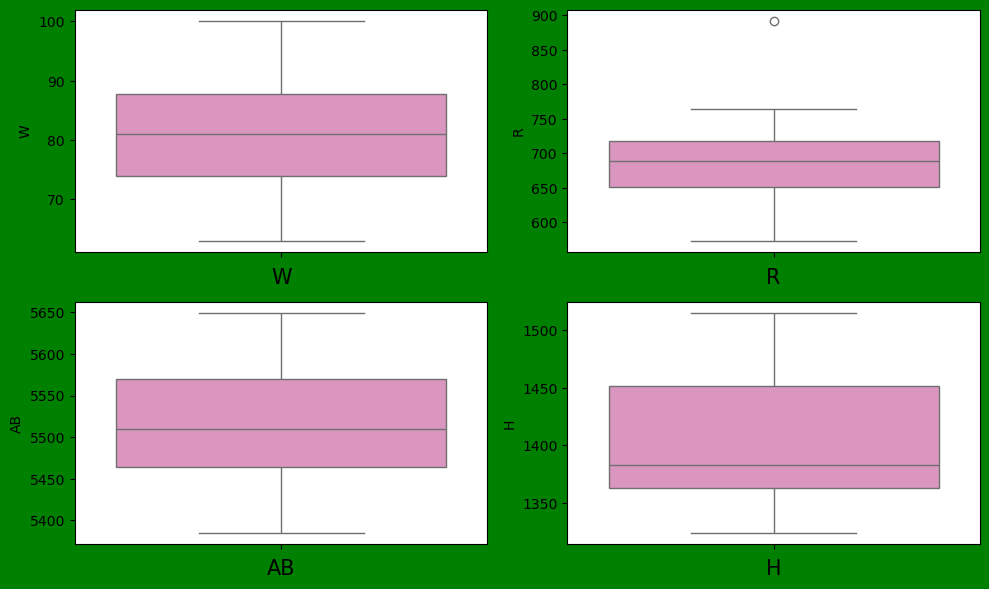

In [172]:
# Lets check the outliers by plotting boxplot.
plt.figure(figsize=(10,6), facecolor='green')
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2, plotnumber)
        sns.boxplot(df[col], palette='Set2_r')
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

in R column outliers are present 

<Axes: ylabel='W'>

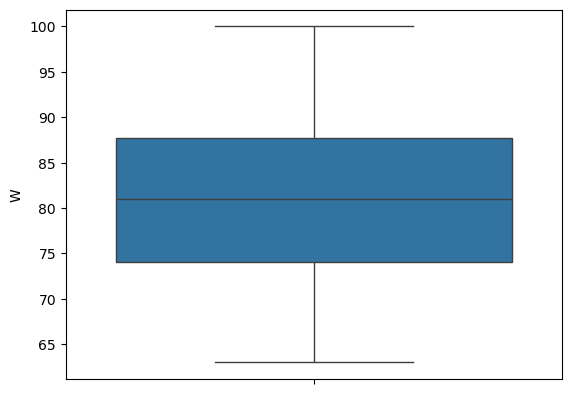

In [173]:
sns.boxplot(df['W'])

<Axes: ylabel='R'>

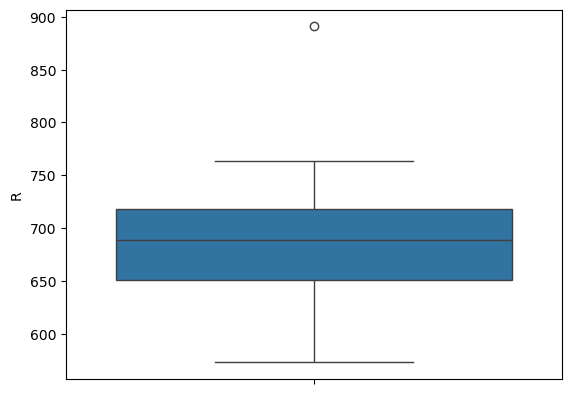

In [175]:
sns.boxplot(df['R'])

Outliers are present in R column

<Axes: ylabel='AB'>

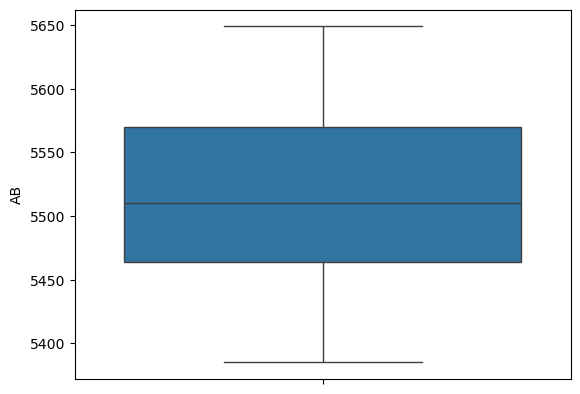

In [176]:
sns.boxplot(df['AB'])

<Axes: ylabel='H'>

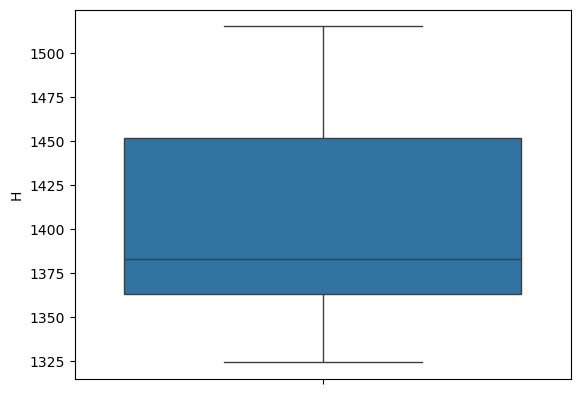

In [179]:
sns.boxplot(df['H'])

<Axes: ylabel='2B'>

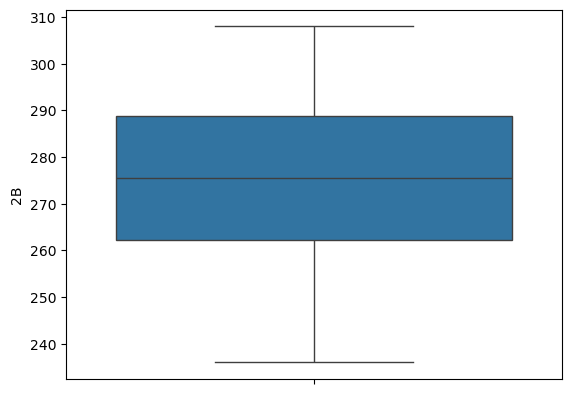

In [180]:
sns.boxplot(df['2B'])

<Axes: ylabel='3B'>

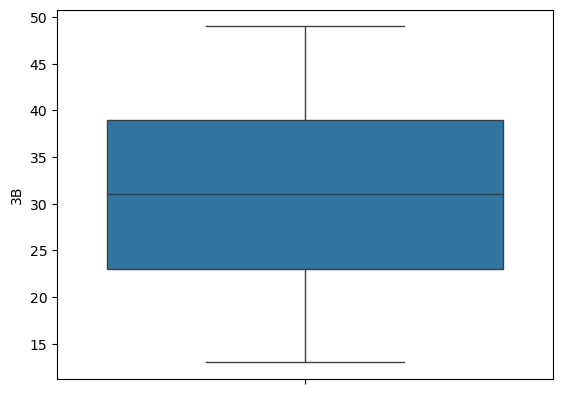

In [181]:
sns.boxplot(df['3B'])

<Axes: ylabel='HR'>

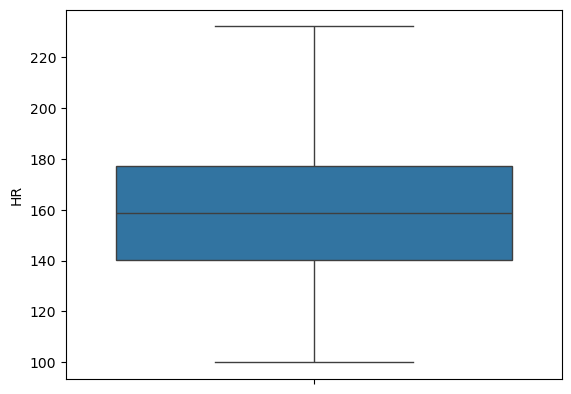

In [182]:
sns.boxplot(df['HR'])

<Axes: ylabel='BB'>

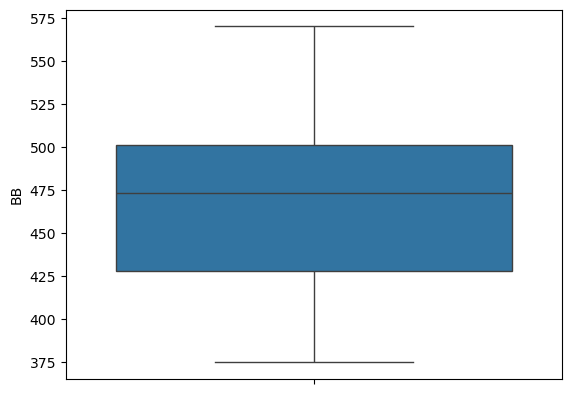

In [183]:
sns.boxplot(df['BB'])

<Axes: >

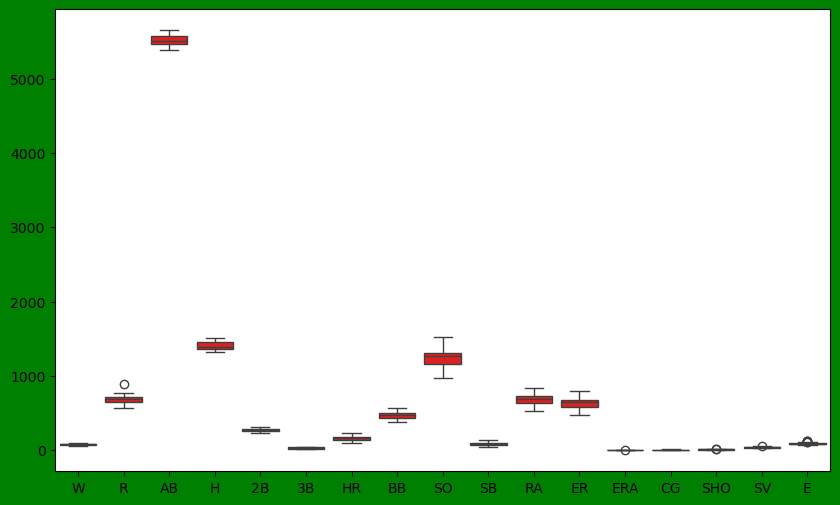

In [187]:
plt.figure(figsize=(10,6), facecolor='green')
sns.boxplot(df,color='r')

here we can see that outliers are present in columns follow by -->R, W,  ERA, SHO, SV, E

# Check Skewness

In [188]:
df.skew

<bound method DataFrame.skew of       W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  2

No any skewness are present, So No need to remove skewness 

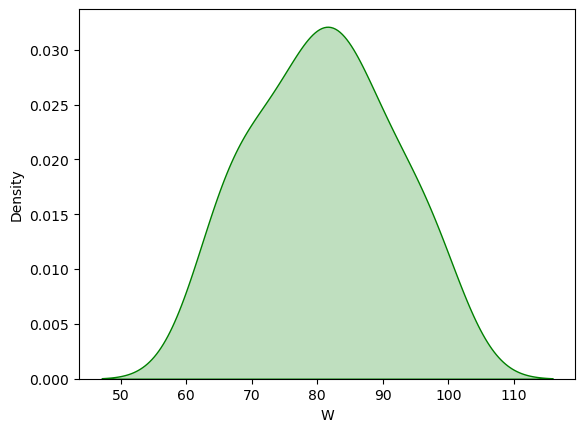

In [191]:
sns.distplot(df['W'], color='g',kde_kws={'shade':True}, hist=False)
plt.show()

In [196]:
df.describe(include='all')

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [197]:
# Checking the correlation between features and the target.
cor=df.corr()
cor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


This gives the correlation between the dependent and independent variables. we can visualize this by plotting heatmap.

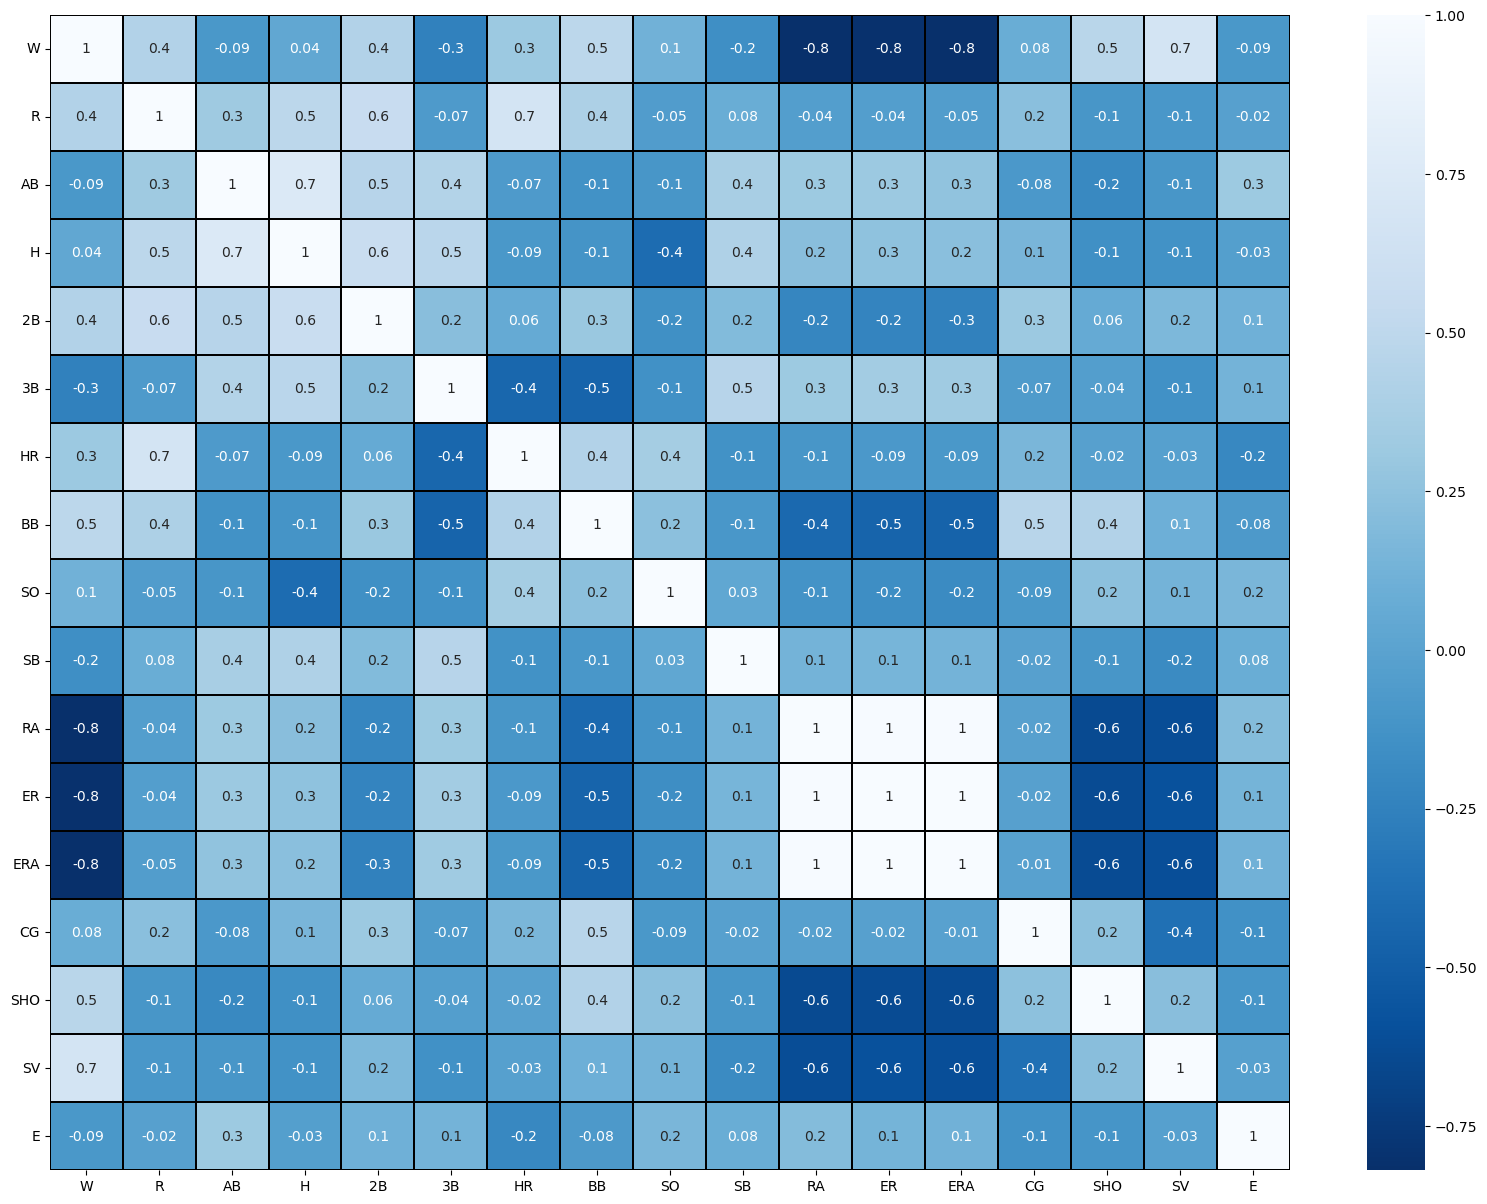

In [198]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1,fmt='.1g',linecolor='black',cmap='Blues_r',annot=True)
plt.yticks(rotation=0);
plt.show()

In [200]:
cor['W'].sort_values(ascending= False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

We can observe the postive and negative correlated features with the target.

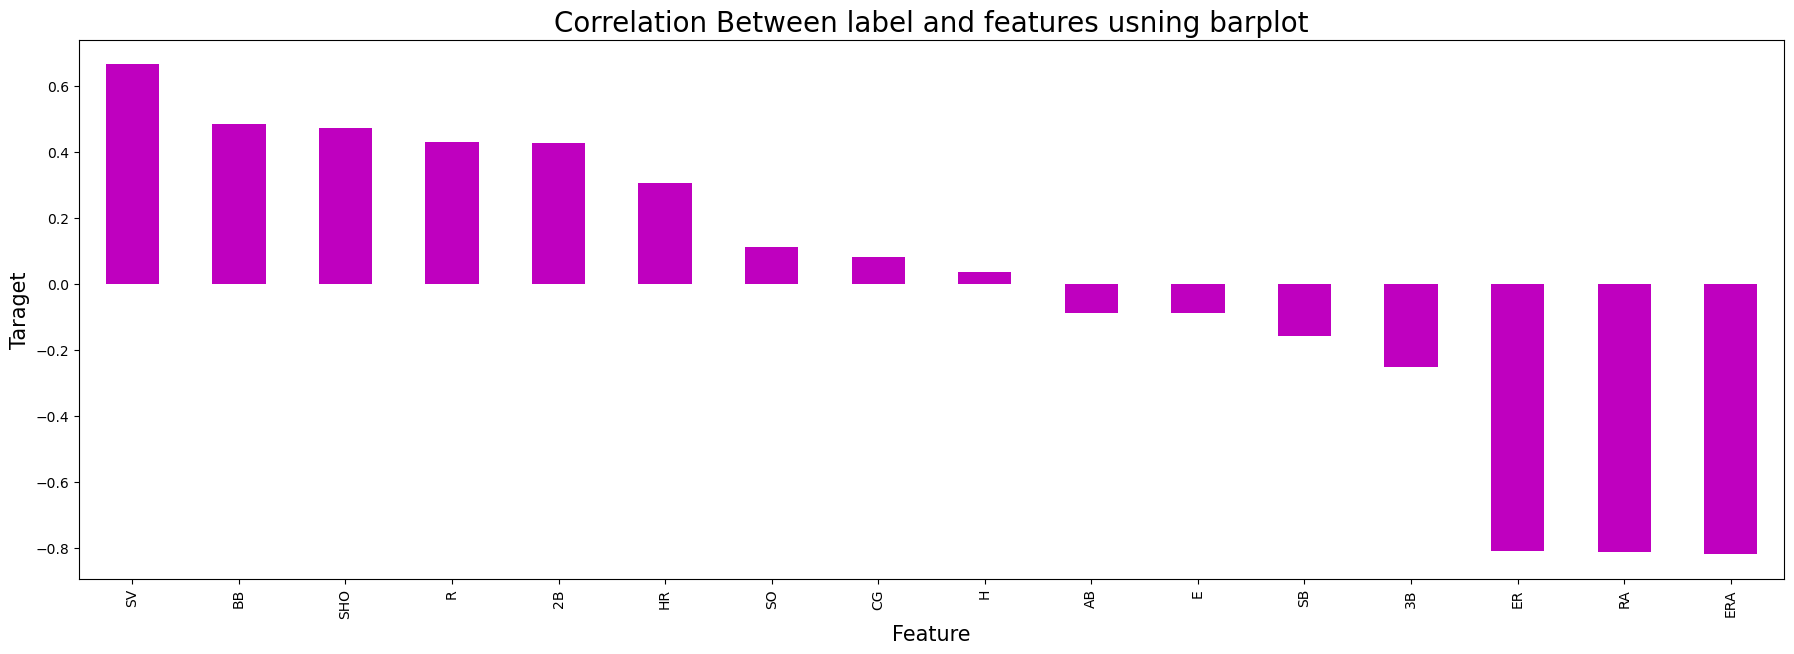

In [203]:
plt.figure(figsize=(22,7))
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Taraget', fontsize=15)
plt.title('Correlation Between label and features usning barplot',fontsize=20)
plt.show()

From the above bar plot we can notice the positive and negative correlation between the features and the target.

# Separating Features and lable

In [207]:
x=df.drop('W',axis=1)
y=df['W']

In [208]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [209]:
y.head()

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

# Feature Scaling using Standard Scalarization

In [210]:
import sklearn
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.619078,0.847731,1.663685,1.420173,1.041193,-0.787299,-1.534902,-2.697630,0.913883,-0.666234,-0.505110,-0.506955,-0.539806,-0.814629,1.671607,-0.461470
1,0.134432,-0.711094,-0.970681,0.127403,1.235809,-0.243967,-0.536592,0.154878,-0.601826,0.165971,0.248930,0.254598,-0.539806,0.172800,0.249879,-0.607197
2,-0.332906,-1.115233,-0.151891,1.588795,-0.223808,-0.723377,1.139144,-0.893982,0.111449,-0.680339,-0.751623,-0.641347,2.772641,-0.320914,-0.654856,-1.117242
3,-1.146419,0.241522,-0.401088,-0.828122,-0.418423,-0.883181,-1.160536,-0.168602,-0.690985,0.180076,0.103922,0.053010,1.300442,-0.567771,-0.784104,0.485758
4,0.013270,1.280738,1.984081,0.801892,1.722347,-0.403770,-0.251360,0.105866,-0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,-1.042600,-0.607197
5,3.509647,-0.104884,1.361089,1.869832,-1.391501,2.185047,1.798742,-0.952796,0.200609,-0.257184,-0.389104,-0.350165,1.300442,-0.320914,-1.171848,-0.461470
6,1.311430,0.732263,-0.116292,-0.153633,-1.196885,1.545833,1.513510,-0.207812,-0.913883,0.137760,0.234429,0.165003,-0.171757,-1.802057,0.637623,-0.097152
7,0.428681,-0.451289,-0.596886,-1.615025,-1.099578,1.705636,-0.910958,0.811641,-1.760897,0.067235,0.147424,0.209800,-1.275906,-0.320914,-0.008617,-1.262970
8,-0.765626,-0.451289,-0.365489,0.183611,0.068115,0.107601,-0.590073,0.605790,0.156029,-0.652129,-0.461608,-0.484557,-0.907856,0.172800,2.188598,0.048576
9,1.034489,1.785913,1.628086,1.082929,0.165423,-0.084163,0.158660,-0.982204,-0.557246,0.913544,0.843461,0.792164,-0.171757,-0.320914,-0.396360,0.194303


# Checking Variance Inflation Factor(VIF)

In [214]:
# Finding Varience inflaction factor in each scaled column i.e, x.shape[1][1/(1-r2)]

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns

vif

,VIF values,Features
0,11.522370,R
1,13.311532,AB
2,10.070668,H
3,4.019297,2B
4,3.294146,3B
5,10.079902,HR
6,3.806098,BB
7,2.652401,SO
8,2.102684,SB
9,191.839155,RA


By checking VIF values we can find the features causing multicollineraity problem.

In [217]:
# Again Checking VIF value to confirm whether the multicollinearty still exists or not 
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns

vif

,VIF values,Features
0,11.522370,R
1,13.311532,AB
2,10.070668,H
3,4.019297,2B
4,3.294146,3B
5,10.079902,HR
6,3.806098,BB
7,2.652401,SO
8,2.102684,SB
9,191.839155,RA


In [222]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    print("Best accurancy is ",maxAccu,"at random_state",maxRS)

Best accurancy is  0 at random_state 0
Best accurancy is  0 at random_state 0
Best accurancy is  0 at random_state 0
Best accurancy is  0 at random_state 0
Best accurancy is  0 at random_state 0
Best accurancy is  0 at random_state 0
Best accurancy is  0 at random_state 0
Best accurancy is  0 at random_state 0
Best accurancy is  0.1111111111111111 at random_state 9
Best accurancy is  0.1111111111111111 at random_state 9
Best accurancy is  0.1111111111111111 at random_state 9
Best accurancy is  0.1111111111111111 at random_state 9
Best accurancy is  0.1111111111111111 at random_state 9
Best accurancy is  0.1111111111111111 at random_state 9
Best accurancy is  0.1111111111111111 at random_state 9
Best accurancy is  0.1111111111111111 at random_state 9
Best accurancy is  0.1111111111111111 at random_state 9
Best accurancy is  0.1111111111111111 at random_state 9
Best accurancy is  0.1111111111111111 at random_state 9
Best accurancy is  0.1111111111111111 at random_state 9
Best accurancy i

Best accurancy is  0.1111111111111111 at random_state 9
Best accurancy is  0.1111111111111111 at random_state 9
Best accurancy is  0.1111111111111111 at random_state 9
Best accurancy is  0.1111111111111111 at random_state 9
Best accurancy is  0.1111111111111111 at random_state 9
Best accurancy is  0.1111111111111111 at random_state 9
Best accurancy is  0.1111111111111111 at random_state 9
Best accurancy is  0.1111111111111111 at random_state 9
Best accurancy is  0.1111111111111111 at random_state 9
Best accurancy is  0.1111111111111111 at random_state 9
Best accurancy is  0.1111111111111111 at random_state 9
Best accurancy is  0.1111111111111111 at random_state 9
Best accurancy is  0.1111111111111111 at random_state 9
Best accurancy is  0.1111111111111111 at random_state 9
Best accurancy is  0.1111111111111111 at random_state 9
Best accurancy is  0.1111111111111111 at random_state 9
Best accurancy is  0.1111111111111111 at random_state 9
Best accurancy is  0.1111111111111111 at random_

In [224]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

# RandomForestClassifier

In [232]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

In [227]:
# Checking accuracy for RandomForestClasifier
RFC= RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.1111111111111111
[[0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0]]
              precision    recall  f1-score   support

          63       0.00      0.00      0.00         0
          64       0.00      0.00      0.00         1
          67       0.00      0.00      0.00         1
          68       0.00      0.00      0.00         1
          74       0.00      0.00      0.00         1
          76       1.00      1.00      1.00         1
          78       0.00      0.00      0.00         1
          81       0.00      0.00      0.00         1
          83       0.00      0.00      0.00         0
          86       0.00      0.00      0.00         1
        

# Logistic Regression

In [228]:
# Checking accuracy for LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.1111111111111111
[[0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]]
              precision    recall  f1-score   support

          63       0.00      0.00      0.00         0
          64       0.00      0.00      0.00         1
          67       0.00      0.00      0.00         1
          68       0.00      0.00      0.00         1
          74       0.00      0.00      0.00         1
          76       1.00      1.00      1.00         1
          78       0.00      0.00      0.00         1
          81       0.00      0.00      0.00         1
          83       0.00      0.00      0.00         0
          85       0.00      0.00      0.00         0
        

# Suport Vector Machine Classifier

In [229]:
# Checking accuracy for Suport Vector Machine Classifier
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.0
[[0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

          64       0.00      0.00      0.00       1.0
          67       0.00      0.00      0.00       1.0
          68       0.00      0.00      0.00       1.0
          74       0.00      0.00      0.00       1.0
          76       0.00      0.00      0.00       1.0
          78       0.00      0.00      0.00       1.0
          81       0.00      0.00      0.00       1.0
          83       0.00      0.00      0.00       0.0
          86       0.00      0.00      0.00       1.0
          93       0.00      0.00      0.00       1.0

    accuracy                           0.00       9.0
   macro avg       0.00      0.00      0.00       9.0
weighted avg       0.00      0.00      0.00       9.0



In [230]:
# Gradient Boosting Classifier

In [231]:
# Checking accuracy for Gradient Boosting Classifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.1111111111111111
[[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]]
              precision    recall  f1-score   support

          64       0.00      0.00      0.00         1
          67       0.00      0.00      0.00         1
          68       0.50      1.00      0.67         1
          71       0.00      0.00      0.00         0
          74       0.00      0.00      0.00         1
          76       0.00      0.00      0.00         1
          78       0.00      0.00      0.00         1
          79       0.00      0.00      0.00         

# AddBoost Classfier

In [234]:
# Checking accurcy for AdaBoost Classifer
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC =ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.0
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0]]
              precision    recall  f1-score   support

          63       0.00      0.00      0.00       0.0
          64       0.00      0.00      0.00       1.0
          67       0.00      0.00      0.00       1.0
          68       0.00      0.00      0.00       1.0
          74       0.00      0.00      0.00       1.0
          76       0.00      0.00      0.00       1.0
          78       0.00      0.00      0.00       1.0
          81       0.00      0.00      0.00       1.0
          83       0.00      0.00      0.00       0.0
          84       0

# Bagging Classifier

In [236]:
# Checking accuracy for BaggingClassifgier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.0
[[0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0]]
              precision    recall  f1-score   support

          64       0.00      0.00      0.00       1.0
          67       0.00      0.00      0.00       1.0
          68       0.00      0.00      0.00       1.0
          74       0.00      0.00      0.00       1.0
          76       0.00      0.00      0.00       1.0
          78       0.00      0.00      0.00       1.0
          80       0.00      0.00      0.00       0.0
          81       0.00      0.00      0.00       1.0
          83       0.00      0.00      0.00       0.0
          84       0

# ExtraTreesClassfier

In [237]:
# Checking accuracy for ExtraTreesClassifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test,predET))

0.1111111111111111
[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]]
              precision    recall  f1-score   support

          64       0.00      0.00      0.00         1
          67       0.00      0.00      0.00         1
          68       0.00      0.00      0.00         1
          71       0.00      0.00      0.00         0
          74       0.00      0.00      0.00         1
          76       0.50      1.00      0.67         1
          78       0.00      0.00      0.00         1
          81       0.00      0.00      0.00         1
          83       0.00      0.00      0.00         0
          86       0.00      0.00      0.00         1
          93       0.00      0.00      0.00         1

    accuracy                           0.11         9
 

In [258]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [259]:
lr =LinearRegression(normalize=True)

In [260]:
lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [261]:
predictions = lr.predict(x_test)

In [262]:
mae = mean_absolute_error(y_test,predictions)

In [263]:
mae

2.604478956429491

In [264]:
from sklearn.linear_model import RidgeCV

In [265]:
rrm = RidgeCV(alphas=(0.01,0.1,1,10),normalize=True)

In [266]:
rrm.fit(x_train,y_train)

RidgeCV(alphas=(0.01, 0.1, 1, 10), normalize=True)

In [267]:
predictions = rrm.predict(x_test)

In [268]:
mae_rrm = mean_absolute_error(y_test,predictions)
mae_rrm

3.242248220121081

Ridge regression model is slightly better than linear regression model because it has less mean absolute error.

Thanks 
* Navin Singh 